In [2]:
data = []
with open('input.txt', 'r') as f:
    for line in f:
        data.append(line.strip())

In [3]:
from dataclasses import dataclass
from enum import Enum


class Op(Enum):
    TURN_ON = 'turn on'
    TURN_OFF = 'turn off'
    TOGGLE = 'toggle'

@dataclass
class Instruction:
    op: Op
    start: tuple[int, int]
    end: tuple[int, int]

def parse_instruction(s: str) -> Instruction:
    parts = s.split()
    i = 0
    if parts[0] == 'turn':
        op = Op(parts[0] + ' ' + parts[1])
        i += 2
    else:
        op = Op(parts[0])
        i += 1
    
    start_coords = tuple(map(int, parts[i].split(',')))
    end_coords = tuple(map(int, parts[i+2].split(',')))
    
    return Instruction(op, start_coords, end_coords)

In [13]:
import numpy as np

def part_1():
    bitmap = np.zeros((1000, 1000))

    for i, instruction in enumerate(data):
        inst = parse_instruction(instruction)
        if inst.op == Op.TURN_ON:
            bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1] = 1
        elif inst.op == Op.TURN_OFF:
            bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1] = 0
        elif inst.op == Op.TOGGLE:
            bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1] = 1 - bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1]

    print(np.sum(bitmap))

part_1()


400410.0


I thought it would be cool to render the light grid and see what it looked like. The final outcome wasn't that spectacular. I also rendered steps along the way and it was just noise. Nothing too interesting there.

15343601.0


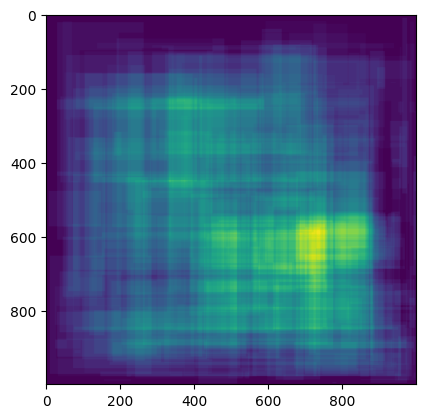

In [10]:
import matplotlib.pyplot as plt

def part_2():
    bitmap = np.zeros((1000, 1000))

    for instruction in data:
        inst = parse_instruction(instruction)

        if inst.op == Op.TURN_ON:
                bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1] += 1
        elif inst.op == Op.TURN_OFF:
            bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1] = np.maximum(0, bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1] - 1)
        elif inst.op == Op.TOGGLE:
            bitmap[inst.start[0]:inst.end[0]+1, inst.start[1]:inst.end[1]+1] += 2

    plt.imshow(bitmap)
    print(np.sum(bitmap))

part_2()

# Test

In [4]:
def test_parse_instruction():
    test_cases = [
        ('turn on 0,0 through 999,999', Instruction(Op.TURN_ON, (0, 0), (999, 999))), 
        ('toggle 0,0 through 999,0', Instruction(Op.TOGGLE, (0, 0), (999, 0))),
        ('turn off 499,499 through 500,500', Instruction(Op.TURN_OFF, (499, 499), (500, 500)))
    ]

    success = True
    for test in test_cases:
        if parse_instruction(test[0]) != test[1]:
            print(f'Test failed: {test[0]}')
            success = False
    assert success

test_parse_instruction()
